,method,iteration,comparisons
0,Linear Search,0,1
1,Linear Search,1,1
2,Linear Search,2,1416
3,Linear Search,3,207
4,Linear Search,4,1
...,...,...,...
115,Ternary Search (Presorted),15,8
116,Ternary Search (Presorted),16,8
117,Ternary Search (Presorted),17,2
118,Ternary Search (Presorted),18,2


,method,iteration,duration_µs
0,Linear Search,0,10
1,Linear Search,1,2
2,Linear Search,2,178
3,Linear Search,3,11
4,Linear Search,4,2
...,...,...,...
115,Ternary Search (Presorted),15,6
116,Ternary Search (Presorted),16,7
117,Ternary Search (Presorted),17,6
118,Ternary Search (Presorted),18,5


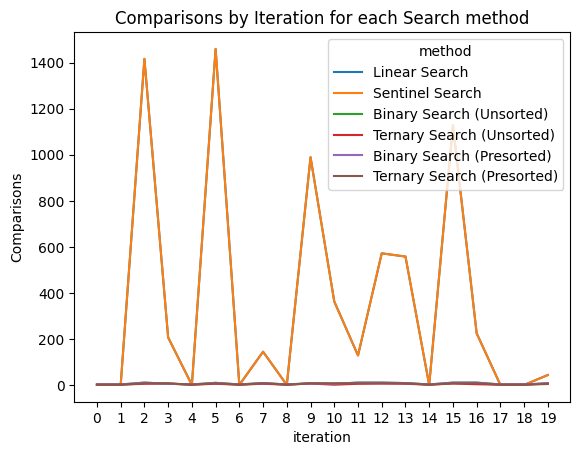

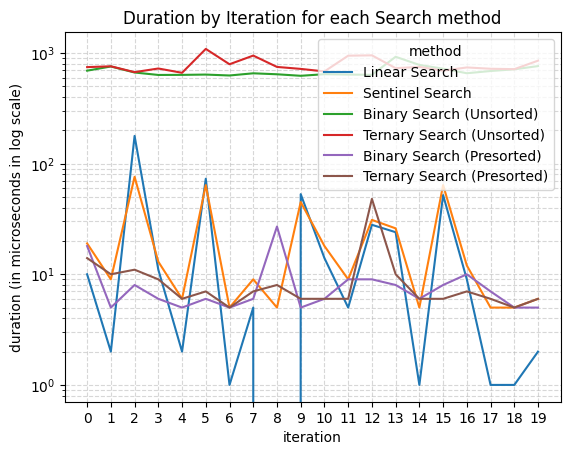

In [ ]:
#Code submitted by Joel Vinas
import requests                 #Used to import file directly from the web
import io                       #Used to import file directly from the web
import numpy as np              #Used to work with math functions
import pandas as pd             #Used to work with data frames
from datetime import datetime   #Used to determine Now()
from datetime import timedelta  #Used to sum timedeltas
import random                   #Used to generate a random number
import matplotlib.pyplot as plt #Used to generate plots
import seaborn as sns           #Used to generate aesthetic plots

#Import the file directly from the web
url = 'https://raw.githubusercontent.com/joelvinas/COMP-SCI_5501/aa4391ae9d3f2cb73e89f3b1fd5bc86bfe34fe2b/Assignment2/Data/words_alpha.txt'
response = requests.get(url)

response.raise_for_status()
if response.status_code == 200:
  dictionary = response.text.splitlines()
else:
  print(f"Error: {response.status_code}")
  exit()

class Treatment:
  iteration = 0
  random_word = ""
  starttime = ""
  endtime = ""
  def __init__(self, iteration, random_word, starttime):
    self.iteration = iteration
    self.random_word = random_word
    self.starttime = starttime
    self.comparisons = 0

  def duration(self):
    return self.endtime - self.starttime

class SearchTools:
  linear_results = []
  sentinel_results = []
  binary_results = []
  binary_sorted_results = []
  ternary_results = []
  ternary_sorted_results = []

  def SearchDuration(self, results):
    curSearchDuration = timedelta(0)
    for curIteration in results:
      curSearchDuration += curIteration.duration()
    SearchMilliseconds = int((curSearchDuration.total_seconds() - int(curSearchDuration.total_seconds())) * 1000)
    return SearchMilliseconds

  def SearchComparisons(self, results):
    totalComparisons = 0
    for curIteration in results:
      totalComparisons += curIteration.comparisons
    return totalComparisons

  def getRandomWord(self, dictionary):
    random_int = random.randint(1, len(dictionary))
    return dictionary[random_int]

  def linear_search(self, index, dictionary, random_word):
    starttime = datetime.now()
    comparisons = 1
    wordIsFound = False
    curTreatment = Treatment(index, random_word, starttime)
    for curWord in dictionary:
      if curWord == random_word:
        curTreatment.endtime = datetime.now()
        wordIsFound = True
        break
      else:
        comparisons += 1
    if not wordIsFound:
      curTreatment.endtime = datetime.now()
    curTreatment.comparisons = comparisons
    return curTreatment

  def sentinel_search(self, index, dictionary, random_word):
    starttime = datetime.now()
    comparisons = 1
    wordIsFound = False
    sentinel_dictionary = dictionary.copy()
    sentinel_dictionary.append(random_word)
    curTreatment = Treatment(index, random_word, starttime)

    for curWord in sentinel_dictionary:
      if curWord == random_word:
        curTreatment.endtime = datetime.now()
        wordIsFound = True
        break
      else:
        comparisons += 1
    #If the word is never found
    if not wordIsFound:
      curTreatment.endtime = datetime.now()
    curTreatment.comparisons = comparisons
    return curTreatment

  def binary_search(self, index, dictionary, random_word, presorted=False):
      starttime = datetime.now()
      comparisons = 1
      wordIsFound = False
      binary_dictionary = dictionary.copy()
      if not presorted:
        binary_dictionary.sort()
      curTreatment = Treatment(index, random_word, starttime)

      begining = 0
      ending = len(binary_dictionary) - 1

      while begining <= ending and not wordIsFound:
        mid = (begining + ending) // 2
        if binary_dictionary[mid] == random_word:
          wordIsFound = True
          curTreatment.endtime = datetime.now()
        else:
          if random_word < binary_dictionary[mid]:
            ending = mid - 1
            comparisons += 1
          else:
            begining = mid + 1
            comparisons += 1
    #If the word is never found
      if not wordIsFound:
        curTreatment.endtime = datetime.now()
      curTreatment.comparisons = comparisons
      return curTreatment

  def ternary_search(self, index, dictionary, random_word, presorted=False):
      starttime = datetime.now()
      comparisons = 1
      wordIsFound = False
      ternary_dictionary = dictionary.copy()
      if not presorted:
        ternary_dictionary.sort()
      curTreatment = Treatment(index, random_word, starttime)

      begining = 0
      ending = len(ternary_dictionary) - 1

      while begining <= ending and not wordIsFound:
        mid1 = begining + (ending - begining) // 3
        mid2 = ending - (ending - begining) // 3
        #Is the word at either of the two midpoints?
        if ternary_dictionary[mid1] == random_word:
          wordIsFound = True
          curTreatment.endtime = datetime.now()
        if ternary_dictionary[mid2] == random_word:
          wordIsFound = True
          curTreatment.endtime = datetime.now()

        if not wordIsFound:
          comparisons += 1
          if random_word < ternary_dictionary[mid1]:
            #Word is in the first 3rd of the range
            ending = mid1 - 1
          elif random_word > ternary_dictionary[mid2]:
            #Word is in the last 3rd of the range
            begining = mid2 + 1
          else:
            #Word is in the second 3rd of the range
            begining = mid1 + 1
            ending = mid2 - 1

    #If the word is never found
      if not wordIsFound:
        curTreatment.endtime = datetime.now()
      curTreatment.comparisons = comparisons
      return curTreatment


  def getDataframe(self, method_name, results):
    column_names = ["method", "iteration", "random_word", "starttime", "endtime", "duration", "comparisons"]
    df = pd.DataFrame(columns = column_names)

    for curIteration in results:
      new_row = [method_name, curIteration.iteration, curIteration.random_word, curIteration.starttime, curIteration.endtime, curIteration.duration(), curIteration.comparisons]
      df.loc[len(df)] = new_row
    return df

#Start Operations
SearchTools = SearchTools()
TotalOperations = 20

#Initialize Random Word list
randWordList = []
for randWord in range(TotalOperations):
  randWordList.append(SearchTools.getRandomWord(dictionary))

# Linear Search
for iteration in range(TotalOperations):
  random_word = randWordList[iteration]
  curTreatment = SearchTools.linear_search(iteration, dictionary, random_word)
  SearchTools.linear_results.append(curTreatment)

# Sentinel Search
for iteration in range(TotalOperations):
  random_word = randWordList[iteration]
  curTreatment = SearchTools.sentinel_search(iteration, dictionary, random_word)
  SearchTools.sentinel_results.append(curTreatment)

# Binary Search (Unsorted)
for iteration in range(TotalOperations):
  random_word = randWordList[iteration]
  curTreatment = SearchTools.binary_search(iteration, dictionary, random_word)
  SearchTools.binary_results.append(curTreatment)

# Ternary Search (Unsorted)
for iteration in range(TotalOperations):
  random_word = randWordList[iteration]
  curTreatment = SearchTools.ternary_search(iteration, dictionary, random_word)
  SearchTools.ternary_results.append(curTreatment)

#Presorted Binary/Ternary Searches
sorted_dictionary = dictionary.copy()
sorted_dictionary.sort()

# Binary Search (Presorted)
for iteration in range(TotalOperations):
  random_word = randWordList[iteration]
  curTreatment = SearchTools.binary_search(iteration, sorted_dictionary, random_word, True)
  SearchTools.binary_sorted_results.append(curTreatment)

# Ternary Search (Presorted)
for iteration in range(TotalOperations):
  random_word = randWordList[iteration]
  curTreatment = SearchTools.ternary_search(iteration, dictionary, random_word, True)
  SearchTools.ternary_sorted_results.append(curTreatment)

#5: Compare the number of comparisons made in each treatment
# print("Question 1 Task 5: Search Algorithms completed for {TotalOperations} samples:")
# print(f"Linear Search: {SearchTools.SearchDuration(SearchTools.linear_results)} milliseconds, {format(SearchTools.SearchComparisons(SearchTools.linear_results),',')} comparisons")
# print(f"Sentinel Search: {SearchTools.SearchDuration(SearchTools.sentinel_results)} milliseconds, {format(SearchTools.SearchComparisons(SearchTools.sentinel_results),',')} comparisons")
# print(f"Binary Search (Unsorted): {SearchTools.SearchDuration(SearchTools.binary_results)} milliseconds, {format(SearchTools.SearchComparisons(SearchTools.binary_results),',')} comparisons")
# print(f"Ternary Search (Unsorted): {SearchTools.SearchDuration(SearchTools.ternary_results)} milliseconds, {format(SearchTools.SearchComparisons(SearchTools.ternary_results),',')} comparisons")
# print(f"Binary Search (Presorted): {SearchTools.SearchDuration(SearchTools.binary_sorted_results)} milliseconds, {format(SearchTools.SearchComparisons(SearchTools.binary_sorted_results),',')} comparisons")
# print(f"Ternary Search (Presorted): {SearchTools.SearchDuration(SearchTools.ternary_sorted_results)} milliseconds, {format(SearchTools.SearchComparisons(SearchTools.ternary_sorted_results),',')} comparisons")


df_all_results = pd.DataFrame()
df_all_results = pd.concat([df_all_results, SearchTools.getDataframe("Linear Search", SearchTools.linear_results)], ignore_index=True)
df_all_results = pd.concat([df_all_results, SearchTools.getDataframe("Sentinel Search", SearchTools.sentinel_results)], ignore_index=True)
df_all_results = pd.concat([df_all_results, SearchTools.getDataframe("Binary Search (Unsorted)", SearchTools.binary_results)], ignore_index=True)
df_all_results = pd.concat([df_all_results, SearchTools.getDataframe("Ternary Search (Unsorted)", SearchTools.ternary_results)], ignore_index=True)
df_all_results = pd.concat([df_all_results, SearchTools.getDataframe("Binary Search (Presorted)", SearchTools.binary_sorted_results)], ignore_index=True)
df_all_results = pd.concat([df_all_results, SearchTools.getDataframe("Ternary Search (Presorted)", SearchTools.ternary_sorted_results)], ignore_index=True)
df_all_results['duration_µs'] = df_all_results['duration'].apply(lambda x: int((x.total_seconds() - int(x.total_seconds())) * 1000 * 1000))

#Question 1 Task 7  Show the comparative analysis for each treatment (for step 5—6):
df_focus = df_all_results[['iteration','method','comparisons','duration_µs']].copy()

#Question 1 Task 7i. individually in form of Tabulated data: (Step 5) comparisons
display(df_focus[['method', 'iteration','comparisons']])
#Question 1 Task 7i. individually in form of Tabulated data: (Step 6) physical time
display(df_focus[['method', 'iteration','duration_µs']])

#Question 1 Task 7ii. individually in form of Line Chart: (Step 5) comparisons
sns.lineplot(data=df_focus, x='iteration', y='comparisons',hue='method')
plt.title('Comparisons by Iteration for each Search method')
plt.ylabel('Comparisons')
plt.xticks(range(0, df_focus['iteration'].max() + 1))
plt.show()

#Question 1 Task 7ii. individually in form of Line Chart:  (Step 6) physical time
fig, ax = plt.subplots()
ax.set_yscale('log')
sns.lineplot(data=df_focus, x='iteration', y='duration_µs',hue='method', ax=ax)

# Add labels and a title
ax.set_xlabel('iteration')
ax.set_ylabel('duration (in microseconds in log scale)')
ax.set_title('Duration by Iteration for each Search method')
plt.xticks(range(0, df_focus['iteration'].max() + 1))

plt.grid(True, which="both", ls="--", alpha=0.5) # Add a grid
plt.show()

#Question 1 Task 8  Show the comparative analysis as average time for each algorithm in form of:
df_summary = df_focus.groupby('method').agg({'comparisons': 'mean', 'duration_µs': 'mean'}).reset_index()
df_summarytable = df_summary.rename(columns={'comparisons': 'mean comparisons', 'duration_µs': 'mean duration (in microseconds)'})

#Question 1 Task 8  i. Tabulated Data
display(df_summarytable)

#Question 1 Task 8  ii. Bar Charts

#plt.figure(figsize=(10, 6)) # Increase figure size
ax = plt.subplots()[1]
ax.set_yscale('log')
sns.barplot(data=df_summary, x='method', y='comparisons')
plt.title('Mean Comparisons by Search Method (Log tv  )') # Add a title
plt.xlabel('Search Method') # Add x-label
plt.ylabel('Mean Comparisons') # Add y-label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


#plt.figure(figsize=(10, 6)) # Increase figure size
ax = plt.subplots()[1]
ax.set_yscale('log')
sns.barplot(data=df_summary, x='method', y='duration_µs', ax=ax)
plt.title('Mean Duration by Search Method (Log Scale)') # Add a title
plt.xlabel('Search Method') # Add x-label
plt.ylabel('Mean Duration (in microseconds in log scale)') # Add y-label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

#Question 1 Task 8  iii. Exaplain your observations.

comparisons_observations = ""
duration_observations = ""

print(f"Comparison Observations: \n{comparisons_observations}")
print(f"Duration Observations:\n{duration_observations}")


,method,mean comparisons,mean duration (in microseconds)
0,Binary Search (Presorted),6.75,8.20
1,Binary Search (Unsorted),6.75,686.00
2,Linear Search,362.15,23.60
3,Sentinel Search,362.15,21.60
4,Ternary Search (Presorted),5.45,9.45
5,Ternary Search (Unsorted),4.35,781.25


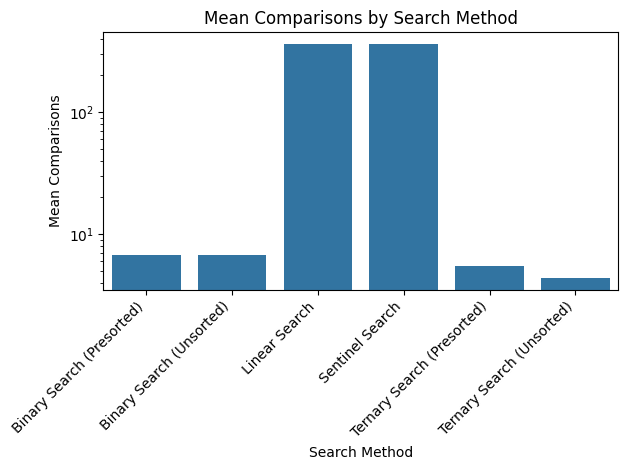

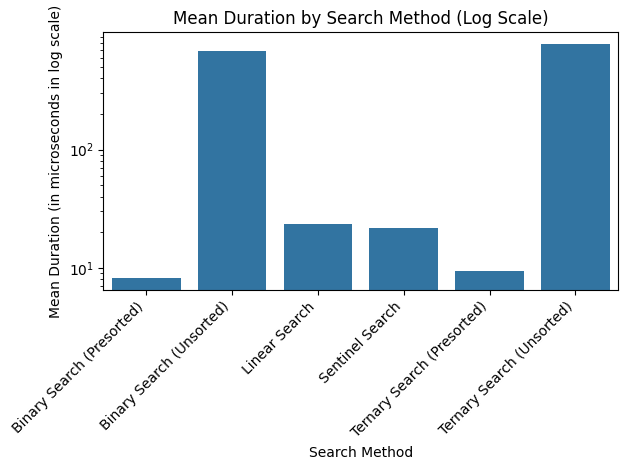